<center>
<h1>Sound it Out</h1>
</center>

<center><i>
Diana Chou, Max Scribner, Lewis Qualkenbush<br>   
CMSC320 Final Tutorial<br>
Fall 2019, John Dickerson
</i></center>

<center><img src='th_sound_comic.png'></center>

### Without any given context, would you able to say a word properly just by reading it? To what extent can we predict the pronounciation of a word from its spelling?

<h3>Table of Contents</h3><h4><ol><li>
    
[Introduction](#0)</li><br><li>
    
[Goal](#1)</li><br><li>

[Data Wrangling](#2)<ul><li>
    
[Cleaning the Data](#2-1)</li><li>

[Finding Unique Characters for Analysis](#2-2)</li><li>

[Finding the Distributions of Letters and Phonemes Within the Data](#2-3)</li></ul><li>

[Data Exploration and Analysis](#3)<ul><li>
    
[Intra-word Co-occurence Map](#3-1)</li><li>

[Finding Clusters Within Words](#3-2)</li><li>

[Preparing Data with Clustering](#3-3)</li><li>

[Intra-cluster Co-occurence Map](#3-4)</li><li>

[Incompatible Clustering Analysis](#3-5)</li></ul><li>
   
[Decision Tree Model](#4)</li><br><li>

[Ideas for Further Improvement](#5)</li><br><li>

[Conclusion](#6)</li></ol></h4>

<a id='0'></a>
### Introduction

A primary goal highlighted in early education is the development of basic speaking and reading skills. Despite this, in 2013, only about one-third of a nationwide sample of fourth graders read at or above the proficient level (<a href="https://www.nationsreportcard.gov/reading_math_2013/#/state-performance">National Center for Education Statistics</a>, 2013). Reading words and being able to pronounce them is a complex process involving the coordination of multiple skills and linguistic systems in order to result in fluent behaviors. It is important for researchers to investigate the skills and systems involved in reading and speaking in order to be able to design educational programs and learning environments that foster growth in these skills and systems. Reading and speaking involves the coordination of multiple systems including orthography and phonology. 

#### Orthography 

Orthography is a set of rules for writing in a language. The word “orthography” is based on the Greek words that mean “right writing”. Every written language (used for education, publishing literature, legal documents, etc.) has some kind of an orthography, which develops over the years as people use it for communication, and literature. The rules are usually written by linguists who know the language well and enjoy the respect of the people who speak the language, and they try to balance general accepted usage and a rigid standard. Formalizing an orthography is a part of larger activity called language planning. 

Orthographic processing involves the visual structure of a word (or string of letters). A majority of the time, you depend on the orthographic representation to quickly know that “cat” is a real word while “cta” is not. Research suggests that the ability to automatically orthographically process strings of letters as words depends on the <a href="https://en.wikipedia.org/wiki/Visual_word_form_area">visual word form area</a> (VWFA) system, which may develop over time with experience with words.

#### Phonology

Phonology is an area of linguistics that explores the sounds of a language. Each language uses a different set of sounds, rules for which sounds follow after one another, what is perceived as syllables, what is the stress of the word, and so on. It is usually researched as part of scientific linguistics and grammar. 

Phonological processing involves the sounds of a language, called phonemes. A majority of the time, you depend on phonological processing to know that “cat” says kuh – ah – tuh. Tasks that delve into phonological processing, such as rhyming games or phoneme manipulation (say “cat” without the kuh), have proven to be some of the strongest correlates and predictors of pronouncing a word. 

##### In order to learn how to read a word and pronounce it correctly, the phonemes that one knows from spoken language (phonology) must be mapped on to the printed letters on the page (orthography).

<br><center><img src="phonemic_chart.jpg" width="70%"></center>

#### Phonology != Phonetics

There are two ways in which we can transcribe speech. Phonemic transcription, also sometimes known as ‘broad’ transcription, involves representing speech using just a unique symbol for each phoneme of the language. The other way we can transcribe speech is using phonetic transcription, also sometimes known as ‘narrow’ transcription, involves representing additional details about the contextual variations in pronunciation that occur in normal speech. 
Phonemic and phonetic transcription both have their purposes. The goal of a phonemic transcription is to record the phonemes as ‘mental categories’ that a speaker uses, rather than the actual spoken variants of those phonemes that are produced in the context of a particular word. Phonetic transcription on the other hand specifies the finer details of how sounds are actually made, and is based on the surrounding context and phonological rules in specific dialects and languages. Thus, the phonemic representation of a word is a more accurate representation on how to say a word and predict its pronunciation based on how it is spelled.

<a id='1'></a>
### Our Goal? <br><br> Create a model that takes in the spelling of a word and output a prediction at its pronunciation!

<a id='2'></a>
### Data Wrangling
#### Downlaoding data

We found the data on a website containing the “top 1000 words” in the English language, and their transcriptions. Code was written which scraped the list of “top 1000 words” and went to their associated web page, finding the transcription in the HTML using BeautifulSoup, python’s requests library, and its regex library.

You can see that code <a href="get_british.html">here</a>

<a id='2-1'></a>
#### Cleaning the Data

Some cleanup of the data was required before the analysis step. There are stress marking ('), long vowel (:), and secondary stress marking (ˌ) characters included in the data that are not important to our analysis, so these are cut out of the word transcriptions. Our code does not work with capitalized letters, so words with capitalized letters had to be changed to lowercase.

In [1]:
import numpy as np
import pandas as pd
import re

pd.options.display.max_columns = None

In [2]:
# Read the CSV into a new dataframe
transcriptions = pd.read_csv("transcriptions/british.csv")

# We want to remove characters we do not want to perform analysis on
transcriptions = transcriptions.replace(to_replace='\'|:|ˌ', value = '', regex = True)
transcriptions['word'] = transcriptions['word'].str.lower()
transcriptions = transcriptions[['word', 'transcription']]

<a id='2-2'></a>
#### Find Unique Characters for Analysis

For the purposes of mapping spellings of words to their pronunciations, we needed to explore the data and find all of the unique characters that are within the set of orthographic symbols and phonological symbols. This will be helpful for when we are mapping later.

In [3]:
from functools import reduce

In [4]:
def get_chars(string):
    chars = set()
    
    for char in string:
        chars.add(char.lower())
        
    return chars

orth_chars = set()
phon_chars = set()

# Get unique characters for both letters and phonemes from the dataset
for index, row in transcriptions.iterrows():
    orth_chars = orth_chars.union(get_chars(row["word"]))
    
    phon_chars = phon_chars.union(get_chars(row["transcription"]))

In [5]:
print(orth_chars)
print(phon_chars)

{'t', 'b', 'r', 'k', 'y', 'j', 's', 'f', 'g', 'e', 'a', 'v', 'z', 'm', 'p', 'w', 'h', 'n', 'x', 'u', 'o', 'd', 'c', 'l', 'q', 'i'}
{'b', 'ɔ', 'r', 'k', 'ə', 'æ', 'g', 'ð', 'v', 'ʒ', 'm', 'ɪ', 'n', 'd', 'u', 'l', 'ŋ', 'i', 't', 'θ', 'ʃ', 'ɒ', 'ʌ', 'j', 's', 'f', 'e', 'ɜ', 'a', 'z', 'p', 'w', 'h', 'ʊ', 'ɑ'}


<a id='2-3'></a>
#### Finding the Distributions of Letters and Phonemes Within the Data

Another aspect of the data that will be important for our statistical calculations later on is the occurrence of each orthographic and phonological character within the dataset overall. This was as simple as running through each row and keeping a count of appearances of that specific character. This value was then normalized on a scale from 0 to 1.

In [6]:
orth_list = list(orth_chars)
phon_list = list(phon_chars)
orth_list.sort()
phon_list.sort()

orth_prob = {k: 0 for k in orth_list}
phon_prob = {k: 0 for k in phon_list}

In [7]:
# Count the number of times a letter or phoneme appears within the dataset
for index, row in transcriptions.iterrows():
    for orth in list(row['word']):
        orth_prob[orth] += 1
    
    for phon in list(row['transcription']):
        phon_prob[phon] += 1

In [8]:
# Normalize the distribution values of letters and phonemes
orth_prob_max = max(orth_prob.values())
phon_prob_max = max(phon_prob.values())

orth_prob = {k: (v/orth_prob_max) for k, v in orth_prob.items()}
phon_prob = {k: (v/phon_prob_max) for k, v in phon_prob.items()}

<a id='3'></a>
### Data Exploration and Analysis

<a id='3-1'></a>
#### Intra-word Co-occurence Map

Before we fit a model to predict how words are pronounced, we found it a good idea to see if some statistics could prove relations between certain words and letters. At its simplest level, we are finding how likely it is that a letter and phoneme are found within the same word, transcription pair. We have a matrix with letters and phonemes where each value holds the weight of that pairs co-occurrence. The higher the value, the more likely we have found that pair to co-occur within a word or transcription. This value is weighted by both the length of the word and transcription as well as the distribution of those characters within the overall dataset. This prevents letters like ‘q’ and ‘z’ from having very small co-occurrence given they are much rarer in orthographic British English.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
hm_orth_dict = {k: v for v, k in enumerate(orth_list)}
hm_phon_dict = {k: v for v, k in enumerate(phon_list)}

# Create a new dataframe to hold the values for the heatmap
heatmap_frame = pd.DataFrame(index=[i for i in range(0, len(hm_phon_dict))], 
                             columns=[i for i in range(0, len(hm_orth_dict))], 
                             data=0)

In [11]:
# Loop through each word, transcription pair in the dataset
for index, row in transcriptions.iterrows():
    word_length = len(row['word'])
    transcription_length = len(row['transcription'])
    
    # Calculate the weight we want to add to that pairing given the current lengths
    # of the word and transcription
    weight = word_length * transcription_length
    weighted_val = float(1/weight)
    
    for orth in list(row['word']):
        for phon in list(row['transcription']):
            # Calculate the weighting based on the distribution of a given letter
            # and phoneme
            dist_weight = float(1/(orth_prob[orth] * phon_prob[phon]))
            
            # Add this weighted value to the heatmap for the given pair
            heatmap_frame.loc[[hm_phon_dict[phon]],[hm_orth_dict[orth]]] += (weighted_val * dist_weight)

In [12]:
heatmap_frame.index = phon_list
heatmap_frame.columns = orth_list

# Normalize the values in the dataframe so they are on a scale from zero to one
max_val = max(heatmap_frame.max())
heatmap_frame = heatmap_frame.div(max_val)

heatmap_frame.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
a,0.003969,0.029146,0.020202,0.041956,0.028675,0.030850,0.025134,0.039240,0.077253,0.000000,0.019858,0.018102,0.019085,0.026525,0.023975,0.010152,0.055852,0.023199,0.016880,0.024855,0.038554,0.021370,0.069365,0.009917,0.071428,0.091077
b,0.026105,0.314658,0.010760,0.029997,0.023149,0.005475,0.028019,0.015855,0.018936,0.070961,0.036696,0.027139,0.010571,0.012811,0.035623,0.004396,0.000000,0.028128,0.013098,0.020640,0.039363,0.016647,0.017364,0.027293,0.047514,0.000000
d,0.029121,0.030818,0.014793,0.173704,0.025441,0.013599,0.034090,0.016395,0.024379,0.140541,0.016026,0.019247,0.010513,0.026312,0.030128,0.011865,0.000000,0.028298,0.019259,0.007900,0.026748,0.009664,0.025009,0.003288,0.028218,0.000000
e,0.048074,0.024077,0.017674,0.029986,0.042354,0.016052,0.038056,0.024838,0.016273,0.011645,0.020648,0.030258,0.022414,0.026550,0.006800,0.029088,0.018325,0.024122,0.029427,0.028371,0.005576,0.036216,0.026950,0.034691,0.056871,0.021834
f,0.028531,0.005474,0.013013,0.014059,0.026828,0.339069,0.027892,0.017514,0.033590,0.000000,0.013025,0.043404,0.019208,0.014356,0.037587,0.003560,0.000000,0.034527,0.011665,0.023769,0.034573,0.016151,0.013577,0.054065,0.010556,0.040549


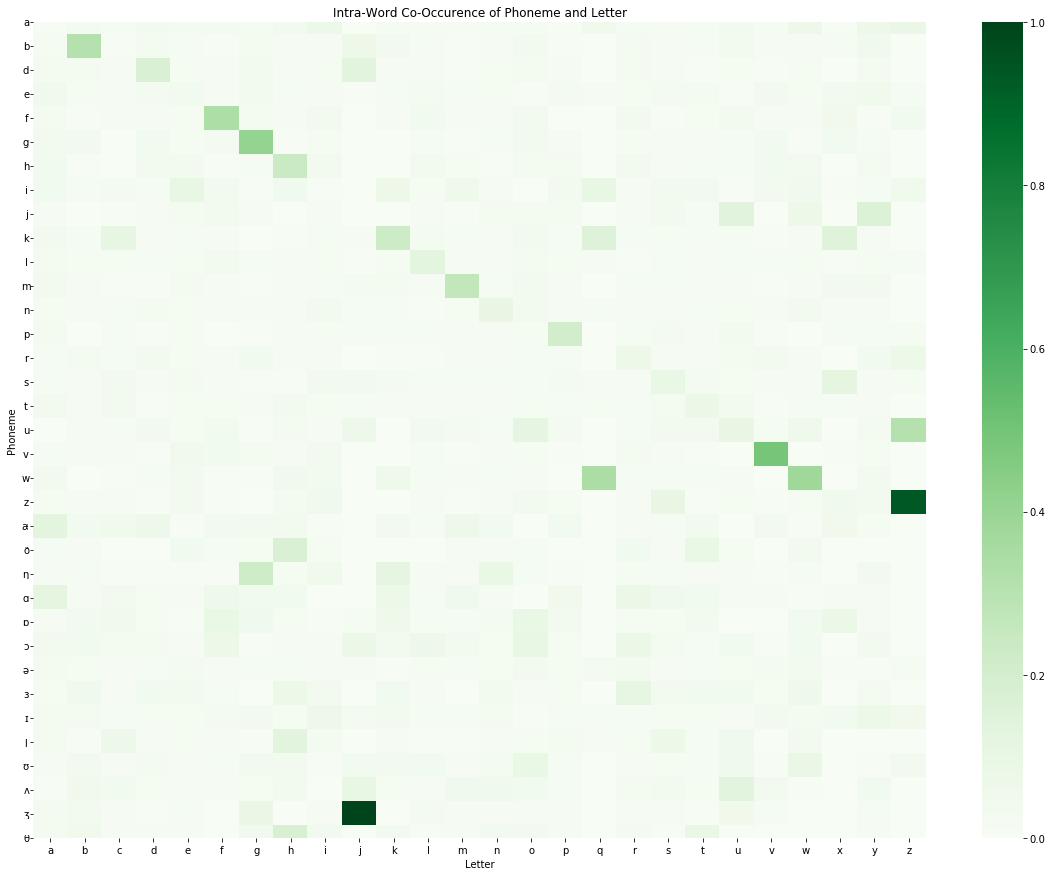

In [13]:
# Plot the dataframe showing the co-occurence values of each phoneme, letter pair
plt.subplots(figsize=(20,15))
ax = sns.heatmap(heatmap_frame, cmap="Greens")
plt.yticks(rotation=0, va="center", ha="center")
ax.set_title('Intra-Word Co-Occurence of Phoneme and Letter'), ax.set_ylabel('Phoneme'), ax.set_xlabel('Letter')
plt.show()

In [14]:
# Find the letter of greatest co-occurence for each phoneme
phon_comax = heatmap_frame.idxmax(axis=1).to_frame()
phon_comax.transpose()

,a,b,d,e,f,g,h,i,j,k,l,m,n,p,r,s,t,u,v,w,z,æ,ð,ŋ,ɑ,ɒ,ɔ,ə,ɜ,ɪ,ʃ,ʊ,ʌ,ʒ,θ
0,z,b,d,y,f,g,h,q,y,k,l,m,n,p,z,x,t,z,v,w,z,a,h,g,a,f,o,o,r,y,h,o,u,j,h


In [15]:
# Find the phoneme of greatest co-occurence for each letter
orth_comax = heatmap_frame.idxmax(axis=0).to_frame()
orth_comax.transpose()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,æ,b,k,d,i,f,g,h,a,ʒ,k,l,m,n,u,p,w,ɜ,z,θ,j,v,w,k,j,z


After the heatmap is created, we can find mappings between the letters and phonemes based on the co-occurrence values. For our purposes here, we are finding the phoneme with the largest co-occurrence value for each letter and the letter with the largest co-occurrence value for each phoneme. This mapping worked rather well from a phonological point of view, where for the most part the consonants in the english alphabet map closely to how we are most likely to pronounce that latter on its own. However, for some of the vowels, they were mapped to consonants, which suggests that our analysis needs to be more granular than intra-word co-occurrence.

<a id='3-2'></a>
#### Finding Clusters Within Words

One way in which we can increase the granularity of our analysis is by digging deeper into the words themselves. We want to make sure that letters are mapped correctly to phonemes in the transcription. Before, we were including relationships between letters and phonemes that may have been in completely different parts of the word. Words are characterized by a specific character ordering, but we can also analyze clusters of these characters within the word. <br> <br>
A cluster is a grouping of different characters within a specific category. A word like ‘enjoy’ would appear as a group of clusters like [‘e’, ‘nj’, ‘oy’] where each cluster within this listing is either a cluster of consonants or vowels. The transcription equivalent of this word would look like ‘ɪndʒɔɪ’ = [‘ɪ’, ‘ndʒ’, ‘ɔɪ’]. We can find the clustering of these words and transcriptions by running them through a function that first assigns each character a vowel or consonant attribute and then runs through that word and finds local groups of these vowels or consonants. We are attempting to map clusters from the word to the transcription. It is worth noting that a character having a consonant or vowel attribute is dependent on information we already know about both orthographic and phonological British English. This data has been added manually to the script. <br> <br>
Another topic of interest is the fact that in the spelling of a word in British English, the character ‘y’ is considered a semivowel in that it can represent both the IPA ‘j’ consonant at the beginning of words like ‘yes’ or what is considered the nucleus vowel of a syllable. In this way, within the spelling of a word, ‘y’ can be considered both a vowel and a consonant, and we have added code that accounts for that.

In [16]:
# Manual listing of consonants and vowels for orthrographical British English
orth_consonants = ['l', 't', 'f', 'm', 'n', 'v', 'p', 'h', 'j', 'w', 'r', 'b', 'x', 'c', 'q', 'z',  'g', 's', 'k', 'd', 'y']
orth_consonants.sort()
orth_vowels = ['i', 'a', 'o', 'e', 'u', 'y']
orth_vowels.sort()

# Manual listing of consonants and vowels for phonological British English
phon_consonants = ['t', 'f', 'd', 'p', 'h', 'ʃ', 'r', 'b', 'θ', 'ŋ', 'g', 'k', 'ʒ', 'l', 'm', 'n', 'v', 'j', 'w', 'ð', 's', 'z']
phon_consonants.sort()
phon_vowels = ['ɑ', 'a', 'ɜ', 'ʊ', 'æ', 'e', 'ə', 'u', 'i', 'ɪ', 'ʌ', 'ɔ', 'ɒ']
phon_vowels.sort()

In [17]:
# Returns the word as a list of strings representing its clusters
# word - word to turn into a list of cluster(letters)-sound(consonant or vowel) pairs
# is_orth - true if word is orthological, false is word is phonemic
def get_cluster(word, is_orth):
    cluster = []
    if (is_orth):
        consonants = orth_consonants
        vowels = orth_vowels
    else:
        consonants = phon_consonants
        vowels = phon_vowels
        
    for i in range(len(word)):
        if (is_orth == True) & (word[i] == 'y'):
            # 'y' is a semivowel (can be either vowel or consonant)
            if i == 0:
                if word[i+1] in consonants:
                    cluster.append(([word[i]],'v'))
                else:
                    cluster.append(([word[i]],'c'))
            else:
                cluster.append(([word[i]],'v'))
        elif word[i] in consonants:
            cluster.append(([word[i]],'c'))
            
        else:
            cluster.append(([word[i]],'v'))
    
    i=0
    while i < len(cluster)-1:
        if cluster[i][1] == cluster[i+1][1]:
            cluster[i] = ((cluster[i][0] + cluster[i+1][0]), cluster[i][1])
            cluster.pop(i+1)
        else:
            i += 1
    
    return cluster

<a id='3-3'></a>
#### Preparing Data with Clustering

In [18]:
clustered_transcriptions = transcriptions.copy()

# Apply clustering function to words and transcriptions in dataframe
clustered_transcriptions.word = clustered_transcriptions.word.apply(get_cluster, args=(True,))
clustered_transcriptions.transcription = clustered_transcriptions.transcription.apply(get_cluster, args=(False,))

In [19]:
# Function to check compatibility of clustered words and their corresponding transcription
def cluster_compatible(word, transcription):
    # Are there the same number of clusters?
    if len(word) != len(transcription):
        return False
    
    # For each pair of clusters, do they have the same vowel or consonant typing?
    for index, tup in enumerate(word):
        if tup[1] != transcription[index][1]:
            return False
    
    # Return true if both of these questions are true
    return True

In [20]:
# Add a new column with the returned value of the cluster_compatible function
clustered_transcriptions['compatible'] = clustered_transcriptions.apply(
    lambda x: cluster_compatible(x.word, x.transcription), axis=1)\

# Print dataframe to file
clustered_transcriptions.to_csv("british_clusters.tsv", sep='\t')

clustered_transcriptions.head()

,word,transcription,compatible
0,"[([a], v)]","[([e, ɪ], v)]",True
1,"[([a], v), ([b], c), ([o, u], v), ([t], c)]","[([ə], v), ([b], c), ([a, ʊ], v), ([t], c)]",True
2,"[([a], v), ([b], c), ([o], v), ([v], c), ([e],...","[([ə], v), ([b], c), ([ʌ], v), ([v], c)]",False
3,"[([a], v), ([c, r], c), ([o], v), ([s, s], c)]","[([ə], v), ([k, r], c), ([ɒ], v), ([s], c)]",True
4,"[([a], v), ([c, t], c)]","[([æ], v), ([k, t], c)]",True


In [21]:
# Pull out compatible tuples for heatmap analysis and incompatible tuples for later analysis
compatible_clust = clustered_transcriptions[clustered_transcriptions['compatible'] == True]
incompatible_clust = clustered_transcriptions[clustered_transcriptions['compatible'] == False]

In [22]:
# Flatten each column
word_clusters = [clust for row in compatible_clust.word for clust in row]
transcription_clusters = [clust for row in compatible_clust.transcription for clust in row]

# Join columns together into new flattened dataframe
flattened_clust = pd.DataFrame({'transcription': transcription_clusters, 'word': word_clusters})
# Create new type column based on typing of current tuple's clusters
flattened_clust['type'] = flattened_clust['word'].apply(lambda x: x[1])
# Pull out cluster from tuple
flattened_clust['word'] = flattened_clust['word'].apply(lambda x: x[0])
flattened_clust['transcription'] = flattened_clust['transcription'].apply(lambda x: x[0])

flattened_clust.head()

,transcription,word,type
0,"[e, ɪ]",[a],v
1,[ə],[a],v
2,[b],[b],c
3,"[a, ʊ]","[o, u]",v
4,[t],[t],c


In [23]:
# Create new dataframes for vowel and consonant clusters for analysis
vowel_clusters = flattened_clust[flattened_clust['type'] == 'v']
consonant_clusters = flattened_clust[flattened_clust['type'] == 'c']

<a id='3-4'></a>
#### Intra-cluster Co-occurence Map

The intra-cluster co-occurrence heatmap was calculated very similarly to the intra-word heatmap, except for the fact that there must be separate heatmaps for the vowels and consonants given this is a specific attribute that each cluster has.

In [24]:
vowel_orth_dict = {k: v for v, k in enumerate(orth_vowels)}
vowel_phon_dict = {k: v for v, k in enumerate(phon_vowels)}

# Create new dataframe for vowel heatmap
vowel_heatmap = pd.DataFrame(index=[i for i in range(0, len(vowel_phon_dict))], 
                             columns=[i for i in range(0, len(vowel_orth_dict))], 
                             data=0)

consonant_orth_dict = {k: v for v, k in enumerate(orth_consonants)}
consonant_phon_dict = {k: v for v, k in enumerate(phon_consonants)}

# Create new dataframe for consonant heatmap
consonant_heatmap = pd.DataFrame(index=[i for i in range(0, len(consonant_phon_dict))], 
                             columns=[i for i in range(0, len(consonant_orth_dict))], 
                             data=0)

In [25]:
# Run through each cluster and add acording weighted value
for index, row in vowel_clusters.iterrows():
    word_clust_length = len(row['word'])
    transcription_clust_length = len(row['transcription'])
    
    # Word length weight calculation
    weight = word_clust_length * transcription_clust_length
    weighted_val = float(1/weight)
    
    for orth in row['word']:
        for phon in row['transcription']:
            # Ditribution weight calulation
            dist_weight = float(1/(orth_prob[orth] * phon_prob[phon]))
            
            # Add new weighted value to overal for letter, phoneme pair
            vowel_heatmap.loc[[vowel_phon_dict[phon]],[vowel_orth_dict[orth]]] += (weighted_val * dist_weight)

# Apply same process to consonant data
for index, row in consonant_clusters.iterrows():
    word_clust_length = len(row['word'])
    transcription_clust_length = len(row['transcription'])
    
    weight = word_clust_length * transcription_clust_length
    weighted_val = float(1/weight)
    
    for orth in row['word']:
        for phon in row['transcription']:
            dist_weight = float(1/(orth_prob[orth] * phon_prob[phon]))
            
            consonant_heatmap.loc[[consonant_phon_dict[phon]],[consonant_orth_dict[orth]]] += (weighted_val * dist_weight)

In [26]:
# Change index and columns names and normalize dataframes
vowel_heatmap.index = phon_vowels
vowel_heatmap.columns = orth_vowels

vowel_max_val = max(vowel_heatmap.max())
vowel_heatmap = vowel_heatmap.div(vowel_max_val)

consonant_heatmap.index = phon_consonants
consonant_heatmap.columns = orth_consonants

consonant_max_val = max(consonant_heatmap.max())
consonant_heatmap = consonant_heatmap.div(consonant_max_val)

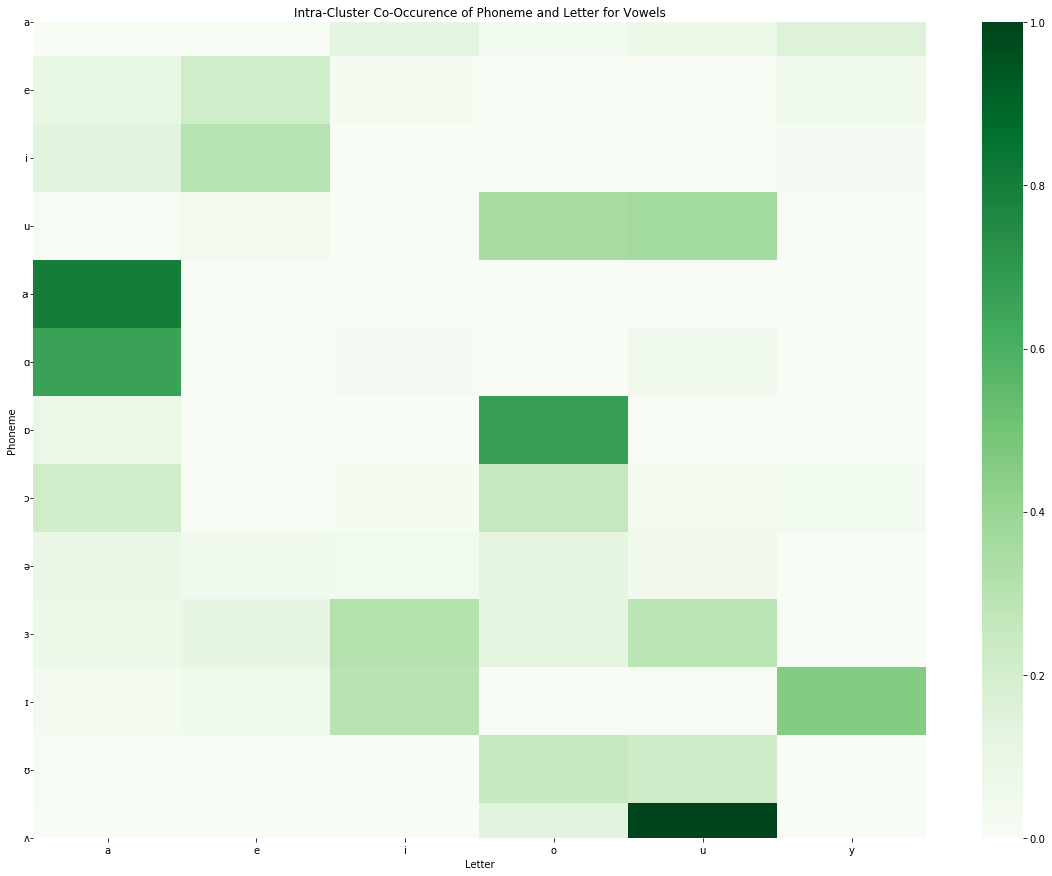

In [27]:
# Plot the dataframe showing the co-occurence values of each phoneme, letter pair
plt.subplots(figsize=(20,15))
ax_vowel = sns.heatmap(vowel_heatmap, cmap="Greens")
plt.yticks(rotation=0, va="center", ha="center")
ax_vowel.set_title('Intra-Cluster Co-Occurence of Phoneme and Letter for Vowels')
ax_vowel.set_ylabel('Phoneme'), ax_vowel.set_xlabel('Letter')
plt.show()

In [28]:
# Find the letter of greatest co-occurence for each phoneme
vowel_phon_comax = vowel_heatmap.idxmax(axis=1).to_frame()
vowel_phon_comax.transpose()

,a,e,i,u,æ,ɑ,ɒ,ɔ,ə,ɜ,ɪ,ʊ,ʌ
0,y,e,e,u,a,a,o,o,o,i,y,o,u


In [29]:
# Find the phoneme of greatest co-occurence for each letter
vowel_orth_comax = vowel_heatmap.idxmax(axis=0).to_frame()
vowel_orth_comax.transpose()

,a,e,i,o,u,y
0,æ,i,ɜ,ɒ,ʌ,ɪ


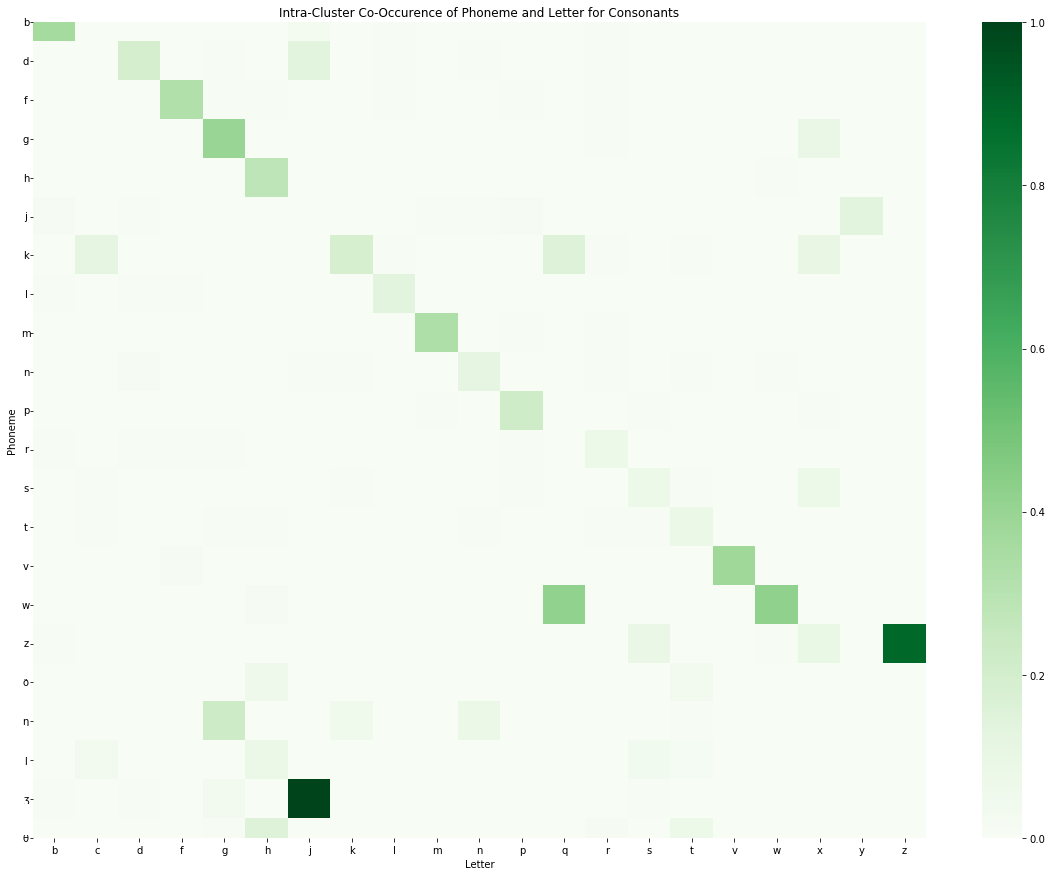

In [30]:
# Plot the dataframe showing the co-occurence values of each phoneme, letter pair
plt.subplots(figsize=(20,15))
ax_consonant = sns.heatmap(consonant_heatmap, cmap="Greens")
plt.yticks(rotation=0, va="center", ha="center")
ax_consonant.set_title('Intra-Cluster Co-Occurence of Phoneme and Letter for Consonants')
ax_consonant.set_ylabel('Phoneme'), ax_consonant.set_xlabel('Letter')
plt.show()

In [31]:
# Find the letter of greatest co-occurence for each phoneme
consonant_phon_comax = consonant_heatmap.idxmax(axis=1).to_frame()
consonant_phon_comax.transpose()

,b,d,f,g,h,j,k,l,m,n,p,r,s,t,v,w,z,ð,ŋ,ʃ,ʒ,θ
0,b,d,f,g,h,y,k,l,m,n,p,r,s,t,v,w,z,h,g,h,j,h


In [32]:
# Find the phoneme of greatest co-occurence for each letter
consonant_orth_comax = consonant_heatmap.idxmax(axis=0).to_frame()
consonant_orth_comax.transpose()

,b,c,d,f,g,h,j,k,l,m,n,p,q,r,s,t,v,w,x,y,z
0,b,k,d,f,g,h,ʒ,k,l,m,n,p,w,r,z,t,v,w,k,j,z


Our co-occurrence mapping code did a good job at ‘correctly’ mapping phonemes to letters. It is interesting to note that for IPA symbols like ‘ʃ’ (unvoiced postalveolar fricative) and ‘ð’ (voiced interdental fricative) are mapped to the letter ‘h’, which makes sense given these sounds are mostly written as ‘sh’ and ‘th’ respectively.

#### Cluster manipulation functions

In [33]:
# split the data into learnable chunks
def split(word):
    out = []
    for x in range(len(word)):
        current_chunk = []
        if x == 0:
            current_chunk.append("")
        else:
            current_chunk.append("".join(word[x-1][0][-2:]))
            
        current_chunk.append("".join(word[x][0]))
        
        if x == len(word) - 1:
            current_chunk.append("")
        else:
            current_chunk.append("".join(word[x+1][0][:2]))
        
        out.append(current_chunk)
        
    return out

# get an array of unannotated string chunks
def get_raw_chunks(word):
    return ["".join(x[0]) for x in word]

print("Letter chunks in context")
print(split(compatible_clust.iloc[70]["word"]))
print("\nRaw transcription chunks")
print(get_raw_chunks(compatible_clust.iloc[70]["transcription"]))

Letter chunks in context
[['', 'br', 'a'], ['br', 'a', 'nc'], ['a', 'nch', '']]

Raw transcription chunks
['br', 'ɑ', 'ntʃ']


<a id='3-5'></a>
#### Incompatible Clustering Analysis 

Incompatible clustersare those whose cluster-count and polarity (cvcv... vs vcvc…) do not match between spelling and pronunciation. We found approximately 35% of our words incompatible. This can happen for many reasons. The most common is that there is a silent letter at the end, leading to the same polarity but a pronunciation which is one cluster fewer than the spelling. In British english this is most common with words ending in "e" or "r", as both are often unvoiced. These take up 75% of the words initially labeled incompatible.

1. “weather” (cvcvc)  → /weðə/ (cvcv)
2. “case” (cvcv)   → /keɪs/ (cvc)

Though this would also be the case if the first cluster was silent, the entire first cluster is never silent. One way we thought of combatting this problem was to pad the pronounciation cluster list with a null (unpronounced) character at the end. This way, we could salvage approximately 26% of our dataset for training.

One issue with the British dialect of English is that “r” is only pronounced in a specific few cases (ex. “train”, “frame”, “boring”, but not “mark”, “cluster”, and “bored”). For this reason, words which have an “r” in the middle often have a chance of creating a cluster mismatch, giving the pronunciation and the spelling a discrepancy of two clusters. Words like “bored” would not be salvaged by our silent-last-letter algorithm. We are still investigating ways to infer the structure of a semivowel, and this is a place of further research in the future.


In [34]:
incompatible_clust.head()

,word,transcription,compatible
2,"[([a], v), ([b], c), ([o], v), ([v], c), ([e],...","[([ə], v), ([b], c), ([ʌ], v), ([v], c)]",False
5,"[([a], v), ([c, t], c), ([i], v), ([v], c), ([...","[([æ], v), ([k, t], c), ([ɪ], v), ([v], c)]",False
9,"[([a], v), ([f, t], c), ([e], v), ([r], c)]","[([ɑ], v), ([f, t], c), ([ə], v)]",False
11,"[([a], v), ([g], c), ([e], v)]","[([e, ɪ], v), ([d, ʒ], c)]",False
14,"[([a, i], v), ([r], c)]","[([e, ə], v)]",False


In [35]:
# prints a subset of a word-transcription dataframe
def print_n(wordframe, n):
    w = list(wordframe["word"].apply(lambda x: get_raw_chunks(x)))
    t = list(wordframe["transcription"].apply(lambda x: get_raw_chunks(x)))
    for i in range(0, len(w), len(w)//n):
        print("\t"+"".join(w[i])+": "+"".join(t[i]))

Words which do not share polarity
	hour: aʊə
	one: wʌn
	unit: junɪt
	use: juz
	useful: jusfəl
	usual: juʒəl
	usually: juʒəlɪ

Words which have a silent last letter
	above: əbʌv
	corner: kɔnə
	give: gɪv
	mistake: mɪsteɪk
	poor: pɔ
	slow: sləʊ
	wonder: wʌndə

Words which have a silent middle cluster
	are: ɑ
	careful: keəfʊl
	everybody: evrɪbɒdɪ
	here: hɪə
	more: mɔ
	share: ʃeə
	sure: ʃɔ


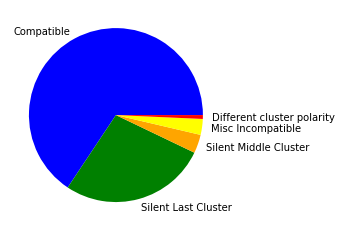

In [125]:
# store number of clusters for each word/transcription
incompatible_clust.loc[:, "word_clusters"] = incompatible_clust['word'].apply(lambda x: len(x))
incompatible_clust.loc[:, "transcription_clusters"] = incompatible_clust['transcription'].apply(lambda x: len(x))

# get the percent of all words which are cluster incompatible
percent_incompatible = len(incompatible_clust)/len(clustered_transcriptions)

# store the polarities of each incompatible word
word_polarities = incompatible_clust['word'].apply(lambda x: x[0][1])
trans_polarities = incompatible_clust['transcription'].apply(lambda x: x[0][1])
# get the percent of incompatible words which have the same polarity
same_start_percent = len(incompatible_clust[word_polarities == trans_polarities])/len(incompatible_clust)

# split into the set of same polarity and opposite polarity words
opp_start = incompatible_clust[word_polarities != trans_polarities]
same_start = incompatible_clust[word_polarities == trans_polarities]

# print some opposite polarity words
print("Words which do not share polarity")
print_n(opp_start, 6)
print()

# Find all words with one fewer phono cluster than cluster (silent last letter)
trans_one_shorter = same_start['word_clusters'] == same_start['transcription_clusters']+1
percent_trans_one_shorter = len(same_start[trans_one_shorter])/len(incompatible_clust)

print("Words which have a silent last letter")
print_n(same_start[trans_one_shorter], 6)
print()

trans_two_shorter = same_start['word_clusters'] == same_start['transcription_clusters']+2
percent_trans_two_shorter = len(same_start[trans_two_shorter])/len(incompatible_clust)
print("Words which have a silent middle cluster")
print_n(same_start[trans_two_shorter], 6)

plt.pie([1-percent_incompatible, 
         percent_incompatible*percent_trans_one_shorter,
         percent_incompatible*percent_trans_two_shorter,
         percent_incompatible*(same_start_percent - percent_trans_one_shorter - percent_trans_two_shorter), 
         percent_incompatible*(1-same_start_percent)], 
        labels=["Compatible", "Silent Last Cluster", "Silent Middle Cluster", "Misc Incompatible", "Different cluster polarity"],
        colors=["blue", "green", "orange", "yellow", "red"])
plt.show()
      

<a id='4'></a>
### Decision Tree Model

After having separated the words into localized data, we were able to analyze it. We know that individual letters can change pronunciation based on the letters around them (ex. The “a” in “ban” vs. “bad”), and are less affected by the clusters far away ("basket" vs. "basker"), and the clustering allowed us to localize the effects of clusters. Our goal is to predict the pronunciation of an entire cluster based on its contents one the contents around it. For this we trained a Decision Tree classifier on the nearest two letters of the clusters surrounding the target cluster, and on the target cluster itself. The decision for two letters was motivated by the fact that letter combinations of two can produce wildly different sounds than their last letter taken alone ( “h” vs. “th,” “ch,” “ah”).

We chose a decision tree model because it seems consistent with the method by which children learn to pronounce words. They are often given a set of rules and told to apply them to a spelling to find its pronounciation. To do so, we one-hot encoded each cluster and the surrounding two clusters, and fed that into our decision tree predictor. We do believe that there are more layers of steps and filters which decrease the likelihood of some phoneme structures, but this as a beginning is shockingly effective.

One issue with this is that it treats each cluster as a completely separate entity from the letters which comprise it. This has its benefits, especially in vowel clusters ('oo' != 'o'), but means that much more data needs to be taken in to understand and recognize every cluster. This also means that there is a high chance a cluster will appear which has not been seen before, and the Decision Tree model has no way of dealing with this. Though we do believe that a rule based system is present in the transformation from spelling to pronunciation, we believe that it is part of a yet to be understood larger process. However, on the dataset we had, our decision tree was very effective, and provides a promising starting point for future research.

Our decision tree has an average of 80% accuracy when tested with 10 fold validation 100 times. This we think is a success, considering how we know that some amount of pronunciation is based on memorization. In the future, we think this data model can be expanded to more robustly and narrowly predict pronunciations of many languages based on cross-linguistic information (like phonemic features).


In [37]:
#preprocess data
X = []
y = []
for i, word in compatible_clust.iterrows():
    X += split(word["word"])
    y += get_raw_chunks(word["transcription"])

X = np.array(X)
y = np.array(y)

print("Input (X):")
print(X)
print("\nCorresponding Output (y):")
print(y)

Input (X):
[['' 'a' '']
 ['' 'a' 'b']
 ['a' 'b' 'ou']
 ...
 ['r' 'o' '']
 ['' 'z' 'oo']
 ['z' 'oo' '']]

Corresponding Output (y):
['eɪ' 'ə' 'b' ... 'əʊ' 'z' 'u']


In [38]:
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.preprocessing import OneHotEncoder

# create encoders to store data binarily
letter_encoder = OneHotEncoder()
letter_encoder.fit(X)
X_p = letter_encoder.transform(X).toarray()

phono_encoder  = OneHotEncoder()
phono_encoder.fit(np.reshape(y,(-1,1)))
y_p = phono_encoder.transform(np.reshape(y,(-1,1))).toarray()

print("ONE HOT ENCODING:\n"+"-"*50)
print("X:")
print(X)
print("X encoded:")
print(X_p)
print()
print("y:")
print(y)
print("y encoded:")
print(y_p)

ONE HOT ENCODING:
--------------------------------------------------
X:
[['' 'a' '']
 ['' 'a' 'b']
 ['a' 'b' 'ou']
 ...
 ['r' 'o' '']
 ['' 'z' 'oo']
 ['z' 'oo' '']]
X encoded:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y:
['eɪ' 'ə' 'b' ... 'əʊ' 'z' 'u']
y encoded:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
# Code to calculate n-fold validation!

from random import shuffle

# generates a random ordering of [0..n]
#   where n = len(arr)
def get_shuf_ordering(arr):
    r = list(range(len(arr)))
    shuffle(r)
    return r

# shuffles an array by rearranging it to an ordering
# 
# an ordering is an arrangement of [0..n]
#
# output[ordering[i]] = input[i]
#
def shuf(arr, ordering):
    assert len(arr) == len(ordering)
    assert max(ordering) == len(arr)-1
    assert min(ordering) == 0
    
    out = np.zeros(arr.shape, dtype=arr.dtype)
    
    for inloc, oloc in enumerate(ordering):
        out[oloc] = arr[inloc]
    
    return out

# Randomizes a pair of arrays X and y, while
#   maintaining their relative ordering
def randomize_Xy(X, y):
    r_ordering = get_shuf_ordering(X)

    X_r = shuf(X, r_ordering)
    y_r = shuf(y, r_ordering)
    
    return X_r, y_r

# randomize X and y, then split them
#   into a training set and test set
#
# X    = input data matrix
# y    = output value array
# fold = the n of the n-fold validation
def x_fold(X, y, fold):
    # index of 1/fold of the data
    percent = int(len(X)/fold)
    
    X_r, y_r = randomize_Xy(X, y)
    
    # all values before percent
    validate_X = X_r[:percent]
    validate_y = y_r[:percent]
    
    # all values after percent
    train_X = X_r[percent:]
    train_y = y_r[percent:]
    
    return train_X, train_y, validate_X, validate_y

In [40]:
# set up average and number of iteratons
avg = 0
iterations = 100

for _ in range(iterations):
    train_X, train_y, validation_X, validation_y = x_fold(X_p, y_p, 10)
    
    tree = DecisionTree().fit(train_X, train_y)
    
    v_score = tree.score(validation_X, validation_y)
    
    avg += v_score

print("Accuracy score: %.01f%%"%(100*avg/iterations))

Accuracy score: 79.6%


In [41]:
dtree = DecisionTree().fit(X_p, y_p)

def predict(word):
    word = np.array(split(word))
    word_p = letter_encoder.transform(word)
    
    return "".join([x[0] for x in phono_encoder.inverse_transform(dtree.predict(word_p))])

print("Some word predictions:\n")

print("Accurate predictions:")
print("\tbasket: "+predict("basket"))
print("\toven: "+predict("oven"))
print("\tpasta: "+predict("pasta"))
print("Inaccurate predictions")
print("\tfrisbee: "+predict("frisbee"))
print("\tartist: "+predict("artist"))
print("\tcomputational: "+predict("computational"))


Some word predictions:

Accurate predictions:
	basket: bæzket
	oven: ɒvən
	pasta: pɑztæ
Inaccurate predictions
	frisbee: frɪzbei
	artist: aɪrtəzt
	computational: kəmpʊteɪtəənəl


<a id='5'></a>
### Ideas for Further Improvement

<ul>
<li>More data! The dataset we focused on is standard British English, also called the Queen’s English. Although this dialect is classified as the standard, the British Isles is made up of many different accents and dialects – more than 37 dialects at the last count. Dialects from other regions of Britain include: Cockney, Estuary, Yorkshire, Northern Irish, Scottish, and more!</li>
<li>A more robust model. We currently treat each cluster as a separate entity not relating to its internal letters, which means that we cannot generalize to new clusters. This is an important area to research.</li>
<li>Explaining data which does not match our clustering model. We hope in the future to explain ways to predict the edge-case words that are not modeled by our cluster analysis, as it’s clearly possible to predict their pronunciation by humans. This often comes down to elided clusters, but that is not the only case, and in exploring the edge cases we believe we will come to a more thorough understanding of the process in general.</li>
</ul>

<a id='6'></a>
### Conclusion

Given our favorable results, we were still bound by certain specifications, such as focusing on one language and having the predicate knowledge of some linguistic rules (knowing the alphabet and what constitutes a consonant or vowel). There are still many factors to consider when creating a prediction on a word’s pronunciation, including human interpretation, language dialects, specific rules, and even sub-regional accents that are difficult to generalize outside of our dataset. Even with these limitations, however, there is still huge potential for expansion outside of the British English dataset we focused on.

Currently, there is a lack of thorough research in relationships amongst different languages as to ways which spelling and pronunciation are related. Each language itself has tried to cotify rules for pronunciation, including <a href="https://en.wikipedia.org/wiki/English_orthography#Combinations_of_vowel_letters">vowel clusters</a> in English orthography, though there hasn’t been any cross-linguistic research, as it’s yet to be explored.

Ultimately, some part of pronunciation is memorization and personal interpretation. Without any given context of a word that is new or unfamiliar to the language, different people would interpret the pronunciation of the word differently in their minds. For example, if we were to make up a word in English and provide no context, two people who speak the same language in exactly the same dialect, could potentially pronounce this new word completely different. 